In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")
inspector = inspect(engine)

In [5]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.
inspector.get_table_names()
columns = inspector.get_columns('measurement')  

last_data = session.query(func.max(func.strftime("%Y-%m-%d", Measurement.date))).all()
last_data

[('2017-08-23',)]

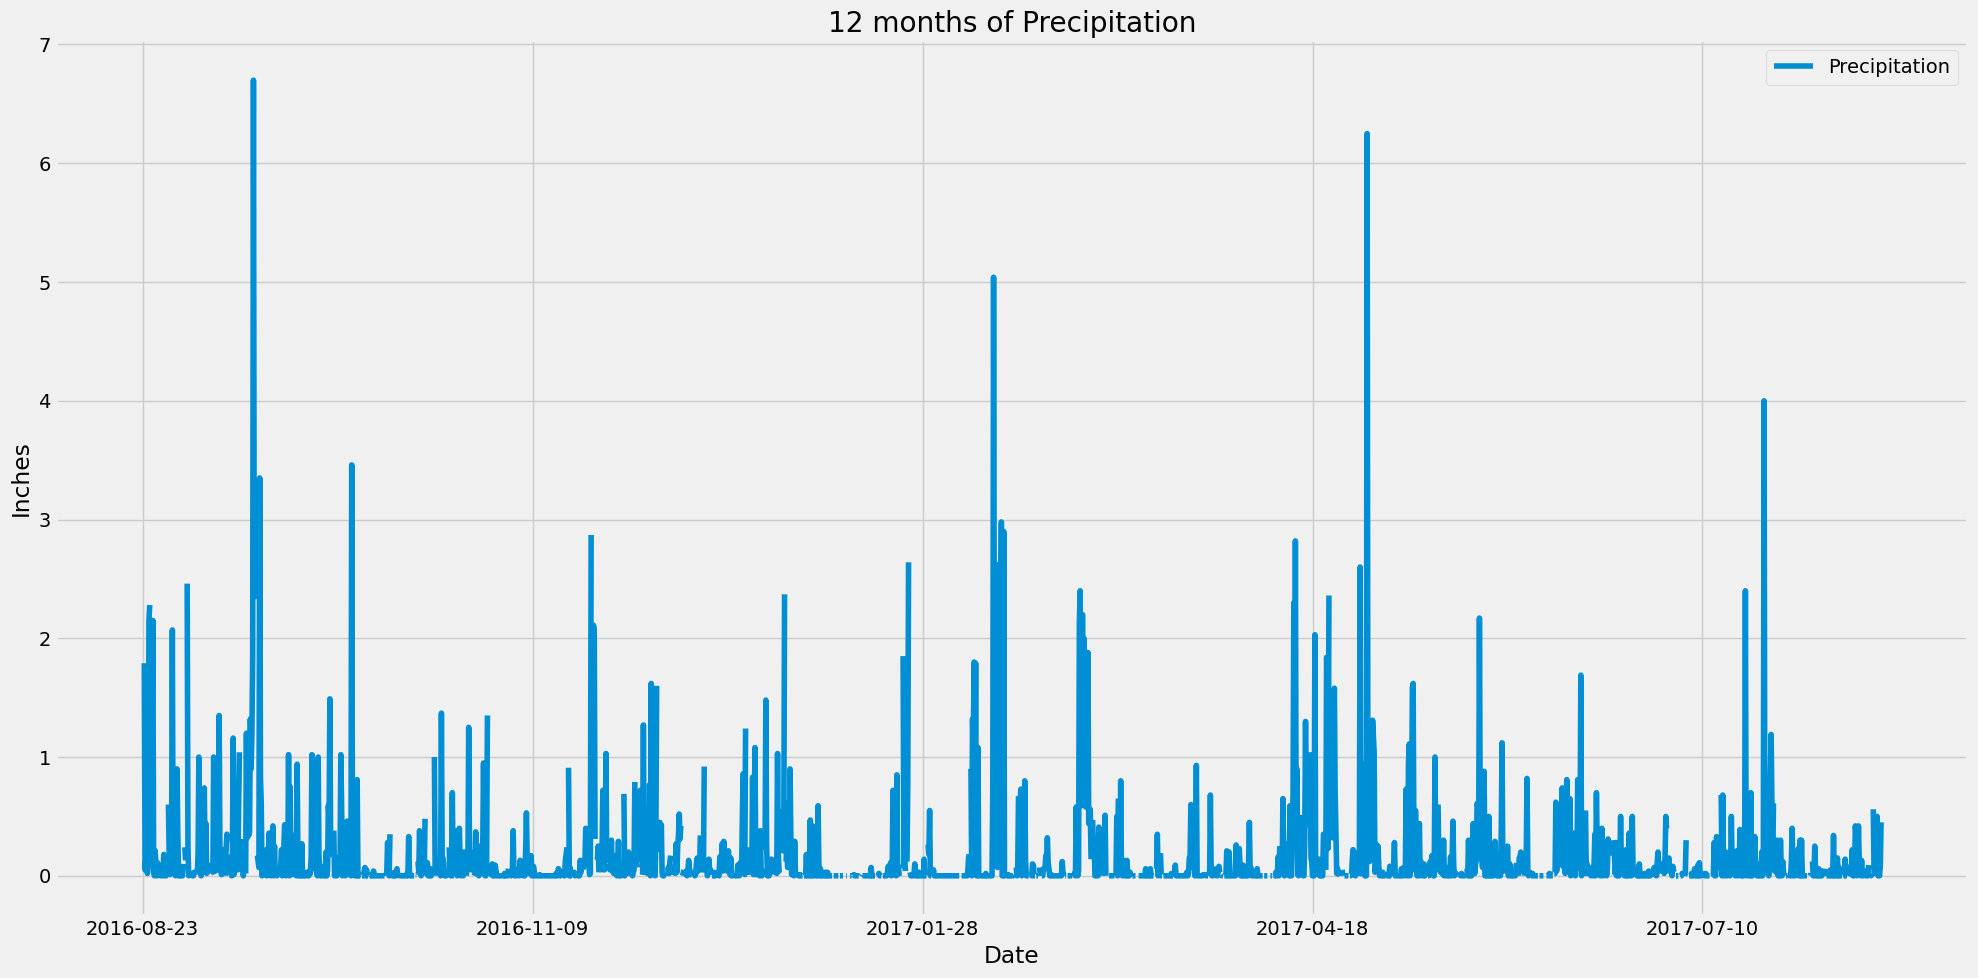

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
#From 2016-08-23 to 2017-08-23, the last 12 months
# Perform a query to retrieve the data and precipitation scores
p_last_year = session.query(func.strftime("%Y-%m-%d", Measurement.date), Measurement.prcp).\
    filter(func.strftime("%Y-%m-%d", Measurement.date) >= dt.date(2016, 8, 23)).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
df = pd.DataFrame(p_last_year, columns=['date', 'prcp']).set_index('date')

# Sort the dataframe by date
precipitation_df = df.sort_values(by='date', ascending=True)

# Use Pandas Plotting with Matplotlib to plot the data
fig, ax = plt.subplots(figsize = (20, 10))
precipitation_df.plot(ax = ax)

ax.set_xlabel('Date')
ax.set_ylabel('Inches')
ax.set_title('12 months of Precipitation')
ax.legend(['Precipitation'])

plt.tight_layout()

plt.savefig("Images/precipitation.png")

plt.show()

In [11]:
# Use Pandas to calculate the summary statistics for the precipitation data
precipitation_df.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [12]:
# Design a query to calculate the total number of stations in the dataset
station_count = session.query(Station.id).distinct().count()
print(station_count)

9


In [13]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
most_active_stations = session.query(Measurement.station, func.count(Measurement.station))\
                        .group_by(Measurement.station)\
                        .order_by(func.count(Measurement.station).desc())\
                        .all()
most_active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [14]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
lowest_temp = session.query(func.min(Measurement.tobs))\
                      .filter(Measurement.station == 'USC00519281')\
                      .first()

highest_temp = session.query(func.max(Measurement.tobs))\
                      .filter(Measurement.station == 'USC00519281')\
                      .first()

average_temp = session.query(func.avg(Measurement.tobs))\
                      .filter(Measurement.station == 'USC00519281')\
                      .first()

print(f"[{lowest_temp}, {highest_temp}, {average_temp}]")

[(54.0,), (85.0,), (71.66378066378067,)]


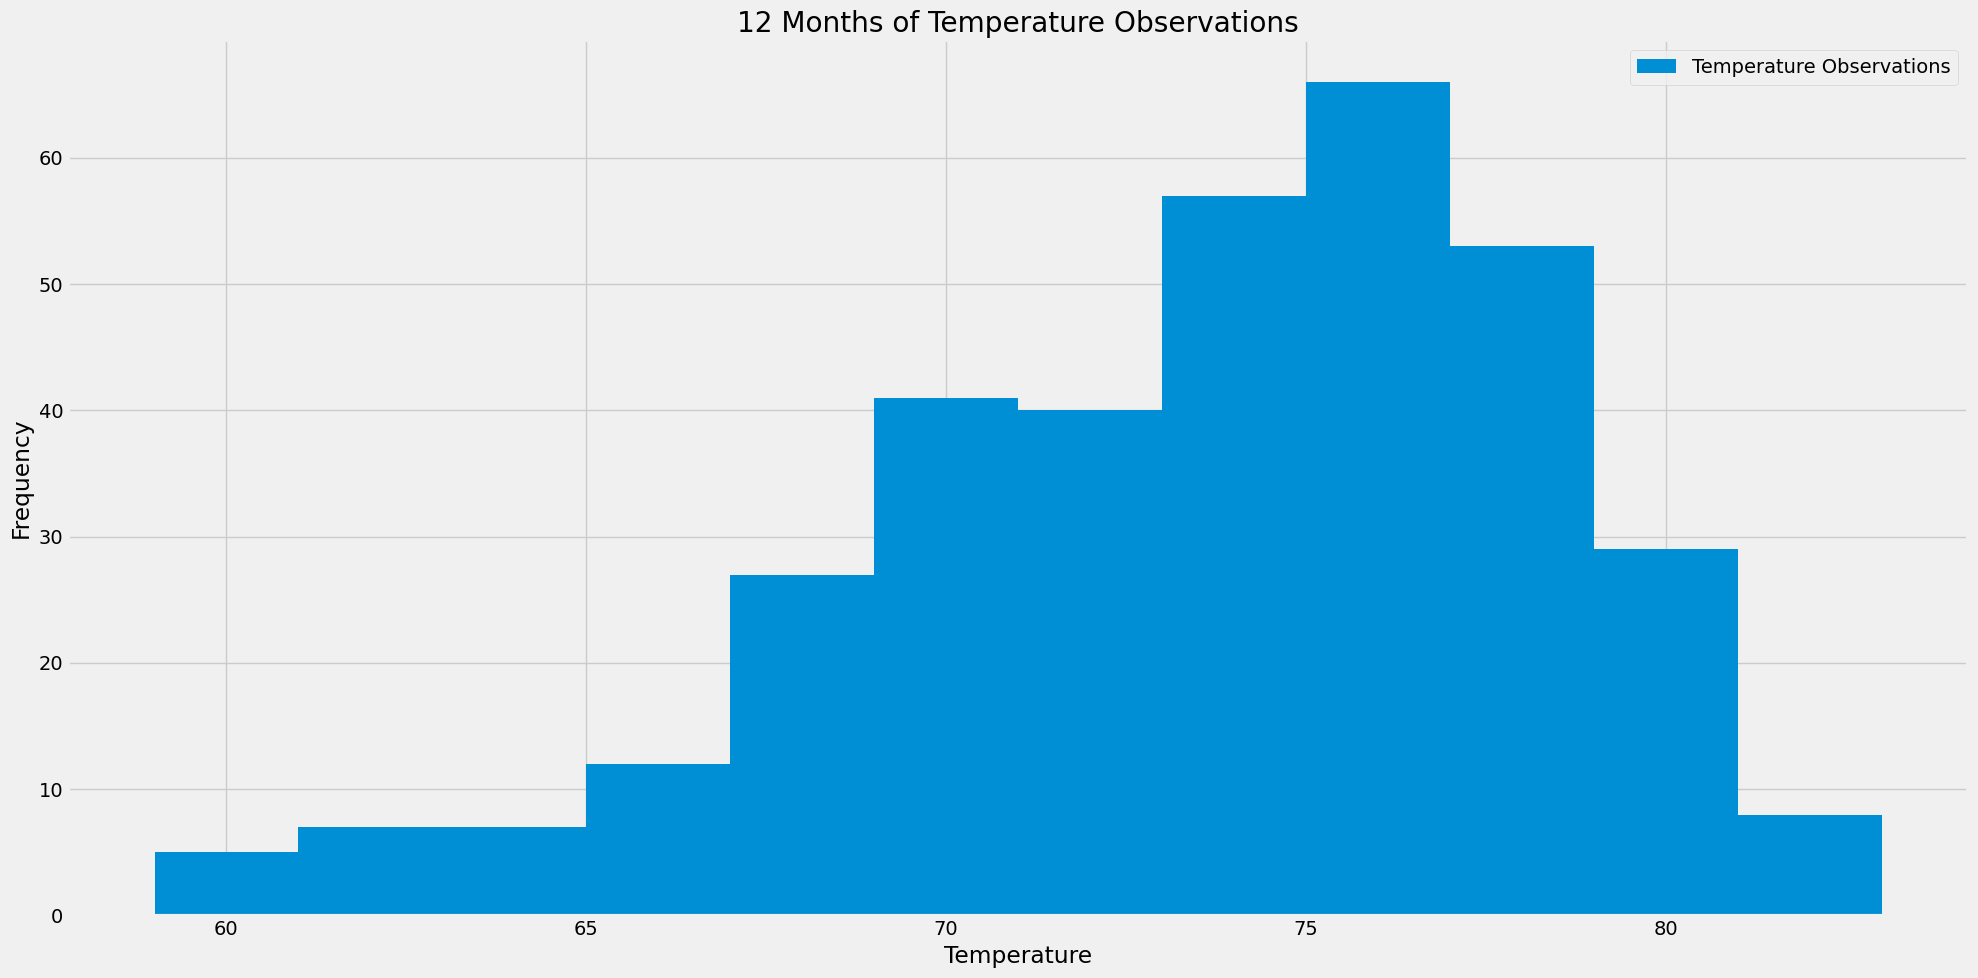

In [15]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
t_last_year = session.query(Measurement.date, Measurement.tobs).\
                        filter(Measurement.station == "USC00519281").\
                        filter(func.strftime("%Y-%m-%d", Measurement.date) >= dt.date(2016, 8, 23)).all()

# Save the query results as a Pandas DataFrame, and set the index by date
temperature_df = pd.DataFrame(t_last_year, columns=['date', 'temperature']).set_index('date')

# Use Pandas Plotting with Matplotlib to plot the data
fig, ax = plt.subplots(figsize = (20, 10))
temperature_df.plot.hist(bins = 12, ax = ax)

ax.set_xlabel('Temperature')
ax.set_ylabel('Frequency')
ax.set_title('12 Months of Temperature Observations')
ax.legend(['Temperature Observations'])

plt.tight_layout()
plt.savefig("Images/temperature observations.png")

plt.show()

# Close Session

In [68]:
# Close Session
session.close()